In [1]:
import pandas as pd
import os

In [ ]:
# 定义统一的数据文件夹路径
data_dir = "./EDC_data"

In [3]:
# 读取单变量文件（Depth_m + Value）
def read_edc_variable(filename, value_col_name, value_col_index=2, skiprows=50):
    filepath = os.path.join(data_dir, filename)
    try:
        df = pd.read_csv(
            filepath,
            delim_whitespace=True,
            encoding="latin-1",
            comment="#",
            skiprows=skiprows,
            header=None
        )
        df = df.iloc[:, [0, value_col_index]]  # 保留 Depth + 指定列
        df.columns = ["Depth_m", value_col_name]
        df["Depth_m"] = pd.to_numeric(df["Depth_m"], errors="coerce")
        df[value_col_name] = pd.to_numeric(df[value_col_name], errors="coerce")
        df = df.dropna()

        print(f"✅ 成功读取 {filename} → {value_col_name}")
        print(df.head())
        print(df.info())
        print("缺失值统计:")
        print(df.isna().sum())

        return df
    except Exception as e:
        print(f"❌ Failed to read {filename}: {e}")
        return pd.DataFrame()

In [4]:
# 读取多变量文件（如 Cl/Na/NO3）
def read_edc_multivars(filename, col_map, skiprows=50):
    """
    col_map: dict, e.g., {1: "Cl", 2: "Na", 3: "NO3"}
    filename: 文件名（相对路径）
    skiprows: 跳过前面的注释行数
    """
    filepath = os.path.join(data_dir, filename)
    try:
        df = pd.read_csv(
            filepath,
            delim_whitespace=True,
            encoding="latin-1",
            comment="#",
            skiprows=skiprows,
            header=None,
            usecols=[0] + list(col_map.keys())
        )
        df.columns = ["Depth_m"] + list(col_map.values())

        # 强制转换为数值
        df["Depth_m"] = pd.to_numeric(df["Depth_m"], errors="coerce")
        for col in col_map.values():
            df[col] = pd.to_numeric(df[col], errors="coerce")

        df = df.dropna()

        print(f"✅ 成功读取 {filename} → {list(col_map.values())}")
        print(df.head())
        print(df.info())
        print("缺失值统计:")
        print(df.isna().sum())

        return df
    except Exception as e:
        print(f"❌ 读取失败: {filename}, 错误: {e}")
        return pd.DataFrame()

In [5]:
# === 高优先级火山代理文件 ===
df_so4 = read_edc_variable("edc2004sulfate.txt", "SO4_ng_g", value_col_index=2)
df_cl_na_no3 = read_edc_multivars("edc-na-cl-no3.txt", {1: "Cl", 2: "Na", 3: "NO3"})
df_ecm = read_edc_variable("edc99_ecm.txt", "ECM", value_col_index=2)
df_dust = read_edc_variable("edc-dust2008.txt", "Dust", value_col_index=1)
df_pb = read_edc_variable("EDC-Pb-isotope-ratios.tab", "Pb_ratio", value_col_index=1)

/var/folders/yw/r2lnbrrd7rn794tknncmhknm0000gn/T/ipykernel_51682/2190943713.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


✅ 成功读取 edc2004sulfate.txt → SO4_ng_g
   Depth_m  SO4_ng_g
2    6.736     74.11
3    6.800     91.01
4    6.864    105.40
5    6.928     83.54
6    7.004     82.74
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84295 entries, 2 to 84318
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Depth_m   84295 non-null  float64
 1   SO4_ng_g  84295 non-null  float64
dtypes: float64(2)
memory usage: 1.9 MB
None
缺失值统计:
Depth_m     0
SO4_ng_g    0
dtype: int64
✅ 成功读取 edc-na-cl-no3.txt → ['Cl', 'Na', 'NO3']
    Depth_m    Cl      Na      NO3
28    7.425  46.8  39.796  66.2538
29    7.975  55.5  20.618  33.0590
30    8.525  64.7  21.603  60.3936
32    9.625  83.1  22.484  27.7191
33   10.175  92.4  27.962  37.6700
<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 28 to 1446
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Depth_m  954 non-null    float64
 1 

In [6]:
# === 气候背景指标 ===
df_d18o = read_edc_variable("edc2013d18oatm.txt", "d18O", value_col_index=1)
df_d15n = read_edc_variable("edc2013d15n.txt", "d15N", value_col_index=1)

✅ 成功读取 edc2013d18oatm.txt → d18O
   Depth_m   d18O
1   134.50  0.250
2   146.05  0.117
3   157.60  0.029
4   168.05 -0.010
5   189.50 -0.026
<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 235
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Depth_m  235 non-null    float64
 1   d18O     235 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB
None
缺失值统计:
Depth_m    0
d18O       0
dtype: int64
✅ 成功读取 edc2013d15n.txt → d15N
   Depth_m   d15N
1  1388.77  0.453
2  1394.27  0.458
3  1399.77  0.483
4  1405.27  0.471
5  1407.47  0.473
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1 to 149
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Depth_m  149 non-null    float64
 1   d15N     149 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB
None
缺失值统计:
Depth_m    0
d15N       0
dtype: int64


In [7]:
# === 年龄模型 ===
def read_edc_age_model():
    try:
        filepath = os.path.join(data_dir, "EDC_age_model_EDC3.tab")
        df = pd.read_csv(
            filepath,
            delim_whitespace=True,
            encoding="latin-1",
            comment="#",
            skiprows=50,
            header=None,
            usecols=[0, 1],
            names=["Depth_m", "b2k_age"]
        )
        df = df.dropna()
        df["Depth_m"] = pd.to_numeric(df["Depth_m"], errors="coerce")
        df["b2k_age"] = pd.to_numeric(df["b2k_age"], errors="coerce")
        df = df.dropna()

        print("✅ 成功读取 EDC3 年龄模型")
        print(df.head())
        print(df.info())
        print("缺失值统计:")
        print(df.isna().sum())

        return df
    except Exception as e:
        print(f"❌ 年龄模型读取失败: {e}")
        return pd.DataFrame()

In [8]:
df_age = read_edc_age_model()

✅ 成功读取 EDC3 年龄模型
   Depth_m  b2k_age
0    15.95       30
1    16.50       31
2    17.05       32
3    17.60       33
4    18.15       34
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5771 entries, 0 to 5770
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Depth_m  5771 non-null   float64
 1   b2k_age  5771 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 90.3 KB
None
缺失值统计:
Depth_m    0
b2k_age    0
dtype: int64


In [11]:
def read_dust_2008(filename="edc-dust2008.txt"):
    filepath = os.path.join(data_dir, filename)
    try:
        df = pd.read_csv(
            filepath,
            delim_whitespace=True,
            encoding="latin-1",
            skiprows=99,
            header=None,
            names=["Depth_m", "EDC3Age_kyrBP", "Dust_ng_g"],
            usecols=[0, 2]  # 我们只保留 Depth 和 Dust
        )
        df["Depth_m"] = pd.to_numeric(df["Depth_m"], errors="coerce")
        df["Dust_ng_g"] = pd.to_numeric(df["Dust_ng_g"], errors="coerce")
        df = df.dropna()

        print("✅ 成功读取 edc-dust2008.txt → Dust_ng_g")
        print(df.head())
        print(df.info())
        print("缺失值统计:")
        print(df.isna().sum())

        return df
    except Exception as e:
        print(f"❌ 读取失败: {filename}, 错误: {e}")
        return pd.DataFrame()

In [12]:
df_dust = read_dust_2008()

✅ 成功读取 edc-dust2008.txt → Dust_ng_g
   Depth_m  Dust_ng_g
0    24.75       57.2
5    27.50       28.0
6    28.05       36.9
7    28.60       43.7
8    29.15       17.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6317 entries, 0 to 6920
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth_m    6317 non-null   float64
 1   Dust_ng_g  6317 non-null   float64
dtypes: float64(2)
memory usage: 148.1 KB
None
缺失值统计:
Depth_m      0
Dust_ng_g    0
dtype: int64


In [13]:
# 按 Depth_m 合并所有变量
df_merged = df_age.copy()  # 先以 df_age 为主，包含 Depth_m 和 b2k_age

# 合并每一个变量表（使用 how="left" 保留主年表的深度）
merge_list = [df_so4, df_cl_na_no3, df_ecm, df_dust, df_d18o, df_d15n, df_pb]

for df in merge_list:
    df_merged = df_merged.merge(df, on="Depth_m", how="left")

In [14]:
# 按 b2k 年龄排序
df_merged = df_merged.sort_values(by="b2k_age")

In [16]:
# 导出为 CSV 文件
df_merged.to_csv("./EDC_merged_data.csv", index=False)

In [17]:
# 信息确认
print("✅ 所有变量合并成功！")
print(df_merged.head())
print(df_merged.info())
print("缺失值统计：")
print(df_merged.isna().sum())

✅ 所有变量合并成功！
   Depth_m  b2k_age  SO4_ng_g  Cl  Na  NO3  ECM  Dust_ng_g  d18O  d15N  \
0    15.95       30       NaN NaN NaN  NaN  NaN        NaN   NaN   NaN   
1    16.50       31       NaN NaN NaN  NaN  NaN        NaN   NaN   NaN   
2    17.05       32       NaN NaN NaN  NaN  NaN        NaN   NaN   NaN   
3    17.60       33       NaN NaN NaN  NaN  NaN        NaN   NaN   NaN   
4    18.15       34       NaN NaN NaN  NaN  NaN        NaN   NaN   NaN   

   Pb_ratio  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5771 entries, 0 to 5770
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth_m    5771 non-null   float64
 1   b2k_age    5771 non-null   int64  
 2   SO4_ng_g   228 non-null    float64
 3   Cl         0 non-null      float64
 4   Na         0 non-null      float64
 5   NO3        0 non-null      float64
 6   ECM        219 non-null    

In [18]:
def safe_read_cols(filepath, skiprows, usecols, col_names):
    try:
        df = pd.read_csv(
            os.path.join(data_dir, filepath),
            delim_whitespace=True,
            encoding="latin-1",
            comment="#",
            skiprows=skiprows,
            header=None,
            usecols=usecols,
            names=col_names
        )
        for col in col_names:
            df[col] = pd.to_numeric(df[col], errors="coerce")
        df = df.dropna()
        print(f"✅ 成功读取 {filepath}")
        print(df.head())
        print(df.info())
        print("缺失值统计：")
        print(df.isna().sum())
        return df
    except Exception as e:
        print(f"❌ 读取失败 {filepath}：{e}")
        return pd.DataFrame()

In [20]:
# edc-pit-no3.txt（高分辨 NO3）
df_pit_no3 = safe_read_cols("edc-pit-no3.txt", skiprows=50, usecols=[0, 1], col_names=["Depth_m", "NO3_pit"])

# edc96_ecm.txt（替代或补充 ECM）
df_ecm_alt = safe_read_cols("edc96_ecm.txt", skiprows=50, usecols=[0, 2], col_names=["Depth_m", "ECM_alt"])

# edc2010pb-ba.txt（另一个 Pb 数据源）
df_pb_ba = safe_read_cols("edc2010pb-ba.txt", skiprows=50, usecols=[0, 1, 2], col_names=["Depth_m", "Pb_alt", "Ba"])

# edc_ca-na.txt（Ca、Na，风尘和海盐替代）
df_ca_na = safe_read_cols("edc-ca-na.txt", skiprows=50, usecols=[0, 1, 2], col_names=["Depth_m", "Ca", "Na_alt"])


✅ 成功读取 edc-pit-no3.txt
   Depth_m  NO3_pit
2      1.5   702.86
3      4.5   117.48
4      7.5    87.03
5     10.5    70.79
6     13.5    64.27
<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 2 to 262
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Depth_m  257 non-null    float64
 1   NO3_pit  257 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB
None
缺失值统计：
Depth_m    0
NO3_pit    0
dtype: int64
✅ 成功读取 edc96_ecm.txt
   Depth_m  ECM_alt
3    100.0    25.80
4    101.0    27.94
5    102.0    28.66
6    103.0    26.80
7    104.0    28.87
<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 3 to 690
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Depth_m  686 non-null    float64
 1   ECM_alt  686 non-null    float64
dtypes: float64(2)
memory usage: 16.1 KB
None
缺失值统计：
Depth_m    0
ECM_alt    0
dtype: int64
✅ 成功读取 edc2010pb-ba.t

In [21]:
df_merged_extended = df_merged.copy()

# 合并每个增强数据源（按 Depth_m 对齐）
supplement_list = [df_pit_no3, df_ecm_alt, df_pb_ba, df_ca_na]

for df in supplement_list:
    df_merged_extended = df_merged_extended.merge(df, on="Depth_m", how="left")

# 输出结果确认
print("✅ 所有补充数据成功合并！")
print(df_merged_extended.head())
print(df_merged_extended.info())
print("缺失值统计：")
print(df_merged_extended.isna().sum())

# 保存最终合并数据（含原始 + 增强变量）
df_merged_extended.to_csv("./EDC_merged_extended.csv", index=False)


✅ 所有补充数据成功合并！
   Depth_m  b2k_age  SO4_ng_g  Cl  Na  NO3  ECM  Dust_ng_g  d18O  d15N  \
0    15.95       30       NaN NaN NaN  NaN  NaN        NaN   NaN   NaN   
1    16.50       31       NaN NaN NaN  NaN  NaN        NaN   NaN   NaN   
2    16.50       31       NaN NaN NaN  NaN  NaN        NaN   NaN   NaN   
3    17.05       32       NaN NaN NaN  NaN  NaN        NaN   NaN   NaN   
4    17.60       33       NaN NaN NaN  NaN  NaN        NaN   NaN   NaN   

   Pb_ratio  NO3_pit  ECM_alt  Pb_alt  Ba  Ca  Na_alt  
0       NaN      NaN      NaN     NaN NaN NaN     NaN  
1       NaN    45.14      NaN     NaN NaN NaN     NaN  
2       NaN    19.69      NaN     NaN NaN NaN     NaN  
3       NaN      NaN      NaN     NaN NaN NaN     NaN  
4       NaN      NaN      NaN     NaN NaN NaN     NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5773 entries, 0 to 5772
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth_m    57

In [22]:
import pandas as pd
import os

# 已读取的原始变量 df（你需要确保这些变量已在运行环境中）
original_dfs = {
    "SO4_ng_g": df_so4,
    "Cl/Na/NO3": df_cl_na_no3,
    "ECM": df_ecm,
    "Dust_ng_g": df_dust,
    "d18O": df_d18o,
    "d15N": df_d15n,
    "Pb_ratio": df_pb,
    "NO3_pit": df_pit_no3,
    "ECM_alt": df_ecm_alt,
    "Pb_alt/Ba": df_pb_ba,
    "Ca/Na_alt": df_ca_na
}

# 主年表 df_age（必须已定义）
assert 'df_age' in globals(), "请先加载 df_age 数据"

# 检查深度范围和 merge 匹配情况
report = []

def check_alignment(name, df, tolerance=0.2):
    result = {
        "变量": name,
        "原始行数": len(df),
        "Depth_min": df["Depth_m"].min(),
        "Depth_max": df["Depth_m"].max(),
        "合并后非空行数": 0,
        "可对齐比例": 0
    }
    if len(df) == 0:
        report.append(result)
        return

    # 确保升序排列（merge_asof 要求）
    df_sorted = df.sort_values("Depth_m")
    df_age_sorted = df_age.sort_values("Depth_m")

    # 模糊 merge，tolerance 设为 0.2 米
    merged = pd.merge_asof(
        df_age_sorted, df_sorted,
        on="Depth_m",
        direction="nearest",
        tolerance=tolerance
    )

    non_null = merged.dropna(axis=0, how="all", subset=merged.columns.difference(["Depth_m", "b2k_age"]))
    result["合并后非空行数"] = len(non_null)
    result["可对齐比例"] = round(len(non_null) / len(df_age_sorted), 3)
    report.append(result)

# 逐个检查
tolerance = 0.2
for var_name, df in original_dfs.items():
    check_alignment(var_name, df, tolerance)

# 输出报告表
report_df = pd.DataFrame(report)
report_df = report_df.sort_values(by="可对齐比例", ascending=False)

print("📊 合并能力评估报告（tolerance = ±{:.1f}m）".format(tolerance))
print(report_df)

📊 合并能力评估报告（tolerance = ±0.2m）
           变量   原始行数  Depth_min  Depth_max  合并后非空行数  可对齐比例
3   Dust_ng_g   6317      4.000   3188.900     5405  0.937
0    SO4_ng_g  84295      6.736   2094.230     3763  0.652
2         ECM   2414    772.000   3187.000     1744  0.302
8     ECM_alt    686    100.000    787.000      507  0.088
4        d18O    235    134.500   1870.020      182  0.032
7     NO3_pit    257      0.500    598.500      168  0.029
5        d15N    149   1388.770   1870.020      143  0.025
10  Ca/Na_alt   1211    375.000  61975.000       42  0.007
9   Pb_alt/Ba     74     86.600   2193.400       37  0.006
6    Pb_ratio     53    573.900   2193.400       27  0.005
1   Cl/Na/NO3    954      7.425    787.325        0  0.000


In [28]:
# 需要检查的文件列表
files_to_check = [
    "edc-na-cl-no3.txt",
    "edc-ca-na.txt",
    "edc2010pb-ba.txt"
]

# 每个文件打印前 N 行
def preview_file(filename, num_lines=20):
    print(f"\n📄 正在查看: {filename}\n{'-'*60}")
    path = os.path.join(data_dir, filename)
    try:
        with open(path, encoding="latin-1") as f:
            for i in range(num_lines):
                line = f.readline()
                print(f"{i+1:02d}: {line.strip()}")
    except Exception as e:
        print(f"❌ 无法读取 {filename}: {e}")

# 执行打印
to_check = files_to_check
for file in to_check:
    preview_file(file, num_lines=120)


📄 正在查看: edc-na-cl-no3.txt
------------------------------------------------------------
01: EPICA Dome C Ice Core Cl, Na and NO3 Data
02: ---------------------------------------------------------------------
03: NOAA Paleoclimatology Program
04: and
05: World Data Center for Paleoclimatology, Boulder
06: ---------------------------------------------------------------------
07: NOTE: PLEASE CITE ORIGINAL REFERENCE WHEN USING THIS DATA!!!!!
08: 
09: 
10: NAME OF DATA SET: EPICA Dome C Ice Core Cl, Na and NO3 Data
11: LAST UPDATE: 6/2005 (Original Receipt by WDC Paleo)
12: 
13: CONTRIBUTORS: Regine Röthlisberger et al., Climate and Environmental Physics,
14: University of Bern, Bern, Switzerland
15: 
16: IGBP PAGES/WDCA CONTRIBUTION SERIES NUMBER: 2005-048
17: 
18: SUGGESTED DATA CITATION: Röthlisberger, R. et al., 2005.
19: EPICA Dome C Ice Core Cl, Na and NO3 Data.
20: IGBP PAGES/World Data Center for Paleoclimatology
21: Data Contribution Series #2005-048.
22: NOAA/NGDC Paleoclimatolog

In [37]:
import pandas as pd
import os

# 目录设定
data_dir = "./EDC_data"

# 重新读取 edc-na-cl-no3.txt（使用正确列和起始行）
def read_cl_na_no3_fixed():
    path = os.path.join(data_dir, "edc-na-cl-no3.txt")
    df = pd.read_csv(
        path,
        delim_whitespace=True,
        skiprows=90,
        usecols=[0, 3, 4, 5],
        names=["Depth_m", "Na", "Cl", "NO3"],
        encoding="latin-1"  
    )
    for col in ["Depth_m", "Na", "Cl", "NO3"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    df = df.dropna(subset=["Depth_m"])
    return df

# 重新读取 edc2010pb-ba.txt（使用正确列和起始行）
def read_pb_ba_fixed():
    path = os.path.join(data_dir, "edc2010pb-ba.txt")
    df = pd.read_csv(
        path,
        delim_whitespace=True,
        skiprows=102,
        usecols=[0, 9, 10],
        names=["Depth_m", "Pb_alt", "Ba"],
        encoding="latin-1"  
    )
    for col in ["Depth_m", "Pb_alt", "Ba"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    df = df.dropna(subset=["Depth_m"])
    return df

# 主合并函数
def merge_corrected_into(df_merged):
    df_cl_na_no3 = read_cl_na_no3_fixed()
    df_pb_ba = read_pb_ba_fixed()

    print("\n📌 合并前对齐统计:")
    print(f"Cl/Na/NO3 原始行数: {len(df_cl_na_no3)}")
    print(f"Pb/Ba 原始行数: {len(df_pb_ba)}")

    df_out = df_merged.copy()
    df_out = df_out.merge(df_cl_na_no3, on="Depth_m", how="left")
    df_out = df_out.merge(df_pb_ba, on="Depth_m", how="left")

    print("\n✅ 修正数据已合并！")
    print(df_out.head())
    print(df_out.info())
    print("缺失值统计：")
    print(df_out[["Cl", "Na", "NO3", "Pb_alt", "Ba"]].isna().sum())

    df_out.to_csv("EDC_merged_corrected.csv", index=False)
    return df_out

In [38]:
# 调用合并
df_final = merge_corrected_into(df_merged_extended)


📌 合并前对齐统计:
Cl/Na/NO3 原始行数: 1420
Pb/Ba 原始行数: 74

✅ 修正数据已合并！
   Depth_m  b2k_age  SO4_ng_g  Cl_x  Na_x  NO3_x  ECM  Dust_ng_g  d18O  d15N  \
0    15.95       30       NaN   NaN   NaN    NaN  NaN        NaN   NaN   NaN   
1    16.50       31       NaN   NaN   NaN    NaN  NaN        NaN   NaN   NaN   
2    16.50       31       NaN   NaN   NaN    NaN  NaN        NaN   NaN   NaN   
3    17.05       32       NaN   NaN   NaN    NaN  NaN        NaN   NaN   NaN   
4    17.60       33       NaN   NaN   NaN    NaN  NaN        NaN   NaN   NaN   

   ...  ECM_alt  Pb_alt_x  Ba_x  Ca  Na_alt  Na_y  Cl_y  NO3_y  Pb_alt_y  Ba_y  
0  ...      NaN       NaN   NaN NaN     NaN   NaN   NaN    NaN       NaN   NaN  
1  ...      NaN       NaN   NaN NaN     NaN   NaN   NaN    NaN       NaN   NaN  
2  ...      NaN       NaN   NaN NaN     NaN   NaN   NaN    NaN       NaN   NaN  
3  ...      NaN       NaN   NaN NaN     NaN   NaN   NaN    NaN       NaN   NaN  
4  ...      NaN       NaN   NaN NaN     NaN   NaN   Na

KeyError: "None of [Index(['Cl', 'Na', 'NO3', 'Pb_alt', 'Ba'], dtype='object')] are in the [columns]"

In [39]:
def merge_corrected_into(df_merged):
    df_cl_na_no3 = read_cl_na_no3_fixed()
    df_pb_ba = read_pb_ba_fixed()

    print("\n📌 合并前对齐统计:")
    print(f"Cl/Na/NO3 原始行数: {len(df_cl_na_no3)}")
    print(f"Pb/Ba 原始行数: {len(df_pb_ba)}")

    # 明确设定合并后缀，避免混乱
    df_out = df_merged.copy()
    df_out = df_out.merge(df_cl_na_no3, on="Depth_m", how="left", suffixes=('', '_new'))
    df_out = df_out.merge(df_pb_ba, on="Depth_m", how="left", suffixes=('', '_new'))

    # 删除旧的无效列（全NaN）
    cols_to_drop = ["Cl", "Na", "NO3", "Pb_alt", "Ba"]
    df_out.drop(columns=cols_to_drop, inplace=True, errors='ignore')

    # 重命名新的有效列去掉后缀_new
    df_out.rename(columns={
        "Cl_new": "Cl",
        "Na_new": "Na",
        "NO3_new": "NO3",
        "Pb_alt_new": "Pb_alt",
        "Ba_new": "Ba"
    }, inplace=True)

    print("\n✅ 修正数据已合并！")
    print(df_out.head())
    print(df_out.info())
    print("缺失值统计：")
    print(df_out[["Cl", "Na", "NO3", "Pb_alt", "Ba"]].isna().sum())

    df_out.to_csv("EDC_merged_corrected.csv", index=False)
    return df_out

In [40]:
df_final = merge_corrected_into(df_merged_extended)


📌 合并前对齐统计:
Cl/Na/NO3 原始行数: 1420
Pb/Ba 原始行数: 74

✅ 修正数据已合并！
   Depth_m  b2k_age  SO4_ng_g  ECM  Dust_ng_g  d18O  d15N  Pb_ratio  NO3_pit  \
0    15.95       30       NaN  NaN        NaN   NaN   NaN       NaN      NaN   
1    16.50       31       NaN  NaN        NaN   NaN   NaN       NaN    45.14   
2    16.50       31       NaN  NaN        NaN   NaN   NaN       NaN    19.69   
3    17.05       32       NaN  NaN        NaN   NaN   NaN       NaN      NaN   
4    17.60       33       NaN  NaN        NaN   NaN   NaN       NaN      NaN   

   ECM_alt  Ca  Na_alt  Na  Cl  NO3  Pb_alt  Ba  
0      NaN NaN     NaN NaN NaN  NaN     NaN NaN  
1      NaN NaN     NaN NaN NaN  NaN     NaN NaN  
2      NaN NaN     NaN NaN NaN  NaN     NaN NaN  
3      NaN NaN     NaN NaN NaN  NaN     NaN NaN  
4      NaN NaN     NaN NaN NaN  NaN     NaN NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5773 entries, 0 to 5772
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------ 

In [41]:
df_final = pd.merge_asof(df_merged_extended.sort_values('Depth_m'),
                         df_cl_na_no3.sort_values('Depth_m'),
                         on='Depth_m', tolerance=0.5, direction='nearest')

In [42]:

# ✅ 重新读取 edc-na-cl-no3.txt（使用正确列和起始行）
def read_cl_na_no3_fixed():
    path = os.path.join(data_dir, "edc-na-cl-no3.txt")
    df = pd.read_csv(
        path,
        delim_whitespace=True,
        skiprows=90,
        usecols=[0, 3, 4, 5],
        names=["Depth_m", "Na", "Cl", "NO3"],
        encoding="latin-1"
    )
    for col in ["Depth_m", "Na", "Cl", "NO3"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    df = df.dropna(subset=["Depth_m"])
    return df

# ✅ 重新读取 edc2010pb-ba.txt（使用正确列和起始行）
def read_pb_ba_fixed():
    path = os.path.join(data_dir, "edc2010pb-ba.txt")
    df = pd.read_csv(
        path,
        delim_whitespace=True,
        skiprows=102,
        usecols=[0, 9, 10],
        names=["Depth_m", "Pb_alt", "Ba"],
        encoding="latin-1"
    )
    for col in ["Depth_m", "Pb_alt", "Ba"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    df = df.dropna(subset=["Depth_m"])
    return df

# ✅ 使用模糊匹配重新合并关键变量
def merge_corrected_into(df_merged):
    df_cl_na_no3 = read_cl_na_no3_fixed().sort_values("Depth_m")
    df_pb_ba = read_pb_ba_fixed().sort_values("Depth_m")

    print("\n📌 合并前对齐统计:")
    print(f"Cl/Na/NO3 原始行数: {len(df_cl_na_no3)}")
    print(f"Pb/Ba 原始行数: {len(df_pb_ba)}")

    df_out = df_merged.copy().sort_values("Depth_m")
    
    # 使用 merge_asof 模糊合并
    df_out = pd.merge_asof(df_out, df_cl_na_no3, on='Depth_m', tolerance=0.5, direction='nearest')
    df_out = pd.merge_asof(df_out, df_pb_ba, on='Depth_m', tolerance=0.5, direction='nearest')

    print("\n✅ 修正数据已模糊合并！")
    print(df_out.head())
    print(df_out.info())
    print("缺失值统计：")
    print(df_out[["Cl", "Na", "NO3", "Pb_alt", "Ba"]].isna().sum())

    df_out.to_csv("EDC_merged_corrected.csv", index=False)
    return df_out


In [43]:
# ✅ 调用合并（需要你已有 df_merged_extended）
df_final = merge_corrected_into(df_merged_extended)


📌 合并前对齐统计:
Cl/Na/NO3 原始行数: 1420
Pb/Ba 原始行数: 74

✅ 修正数据已模糊合并！
   Depth_m  b2k_age  SO4_ng_g  Cl_x  Na_x  NO3_x  ECM  Dust_ng_g  d18O  d15N  \
0    15.95       30       NaN   NaN   NaN    NaN  NaN        NaN   NaN   NaN   
1    16.50       31       NaN   NaN   NaN    NaN  NaN        NaN   NaN   NaN   
2    16.50       31       NaN   NaN   NaN    NaN  NaN        NaN   NaN   NaN   
3    17.05       32       NaN   NaN   NaN    NaN  NaN        NaN   NaN   NaN   
4    17.60       33       NaN   NaN   NaN    NaN  NaN        NaN   NaN   NaN   

   ...  ECM_alt  Pb_alt_x  Ba_x  Ca  Na_alt     Na_y     Cl_y   NO3_y  \
0  ...      NaN       NaN   NaN NaN     NaN      NaN      NaN  11.426   
1  ...      NaN       NaN   NaN NaN     NaN  24.0991  12.4245  13.328   
2  ...      NaN       NaN   NaN NaN     NaN  24.0991  12.4245  13.328   
3  ...      NaN       NaN   NaN NaN     NaN  36.0227  24.5618  13.601   
4  ...      NaN       NaN   NaN NaN     NaN      NaN      NaN  13.492   

   Pb_alt_y  Ba_y 

KeyError: "None of [Index(['Cl', 'Na', 'NO3', 'Pb_alt', 'Ba'], dtype='object')] are in the [columns]"

In [44]:
# 删除全空的列，防止干扰合并
cols_to_remove = ['Cl', 'Na', 'NO3', 'Pb_alt', 'Ba']
df_merged_extended.drop(columns=cols_to_remove, inplace=True, errors='ignore')

In [45]:
df_final = merge_corrected_into(df_merged_extended)


📌 合并前对齐统计:
Cl/Na/NO3 原始行数: 1420
Pb/Ba 原始行数: 74

✅ 修正数据已模糊合并！
   Depth_m  b2k_age  SO4_ng_g  ECM  Dust_ng_g  d18O  d15N  Pb_ratio  NO3_pit  \
0    15.95       30       NaN  NaN        NaN   NaN   NaN       NaN      NaN   
1    16.50       31       NaN  NaN        NaN   NaN   NaN       NaN    45.14   
2    16.50       31       NaN  NaN        NaN   NaN   NaN       NaN    19.69   
3    17.05       32       NaN  NaN        NaN   NaN   NaN       NaN      NaN   
4    17.60       33       NaN  NaN        NaN   NaN   NaN       NaN      NaN   

   ECM_alt  Ca  Na_alt       Na       Cl     NO3  Pb_alt  Ba  
0      NaN NaN     NaN      NaN      NaN  11.426     NaN NaN  
1      NaN NaN     NaN  24.0991  12.4245  13.328     NaN NaN  
2      NaN NaN     NaN  24.0991  12.4245  13.328     NaN NaN  
3      NaN NaN     NaN  36.0227  24.5618  13.601     NaN NaN  
4      NaN NaN     NaN      NaN      NaN  13.492     NaN NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5773 entries, 0 to 5772
Data 

In [47]:
def read_wolff2010_edc():
    df = pd.read_csv(
        "./EDC_data/wolff2010-edc-ions-aicc2012.txt",
        delim_whitespace=True,
        comment='#',
        na_values='N/A'
    )
    # 检查数据
    print(df.head())
    print(df.info())
    return df

df_wolff2010 = read_wolff2010_edc()

   Top_depth_m  Age_kabp  Mid_depth_m  MSA_ugperkg Cl_ugperkg  NO3_ugperkg  \
0         7.15    0.0397        7.425     2.257500    61.8487     14.66630   
1         7.70    0.0484        7.975     2.468000      30.76     18.56500   
2         8.25    0.0571        8.525     2.398330    69.4191     18.39820   
3         8.80    0.0664        9.075          NaN        NaN          NaN   
4         9.35    0.0757        9.625     0.395556    11.4782      9.69818   

   SO4_ugperkg  Na_ugperkg  Ca_ugperkg  ssNa_ugperkg  nssca_ugperkg  \
0      65.0950     66.2538         NaN           NaN            NaN   
1      95.7070     33.0590         NaN           NaN            NaN   
2     136.2560     60.3936         NaN           NaN            NaN   
3          NaN         NaN         NaN           NaN            NaN   
4      82.8354     27.7191         NaN           NaN            NaN   

   nssSO4_trad_ugperkg  nssSO4_si_ugperkg  accrate_kgm-2yr-1  \
0            48.411513          58.42160

In [48]:
df_wolff_sub = df_wolff2010[['Mid_depth_m', 'Age_kabp', 'MSA_ugperkg', 'Cl_ugperkg', 'NO3_ugperkg',
                             'SO4_ugperkg', 'Na_ugperkg', 'Ca_ugperkg', 'ssNa_ugperkg', 
                             'nssca_ugperkg', 'nssSO4_trad_ugperkg', 'nssSO4_si_ugperkg']]

In [49]:
df_final = df_final.sort_values("Depth_m")
df_wolff_sub = df_wolff_sub.rename(columns={"Mid_depth_m":"Depth_m"}).sort_values("Depth_m")

df_final = pd.merge_asof(
    df_final,
    df_wolff_sub,
    on='Depth_m',
    tolerance=0.5, # 可根据实际情况微调
    direction='nearest'
)

In [50]:
# 读取 wolff 数据集全部关键数据（包括flux类数据）
df_wolff_sub = df_wolff2010[[
    'Mid_depth_m', 'Age_kabp', 'MSA_ugperkg', 'Cl_ugperkg', 'NO3_ugperkg',
    'SO4_ugperkg', 'Na_ugperkg', 'Ca_ugperkg', 'ssNa_ugperkg',
    'nssca_ugperkg', 'nssSO4_trad_ugperkg', 'nssSO4_si_ugperkg',
    'Naflux_ugm-2yr-1', 'ssNaflux_ugm-2yr-1', 'nssCaflux_ugm-2yr-1',
    'nssSO4flux_trad_ugm-2yr-1', 'nssSO4flux_si_ugm-2yr-1'
]]

# 调整列名用于合并
df_wolff_sub.rename(columns={"Mid_depth_m": "Depth_m"}, inplace=True)

# 模糊合并到现有数据集
df_final = pd.merge_asof(
    df_final.sort_values('Depth_m'),
    df_wolff_sub.sort_values('Depth_m'),
    on='Depth_m',
    tolerance=0.5,
    direction='nearest'
)

# 检查合并后的数据质量
print(df_final.info())
print(df_final.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5773 entries, 0 to 5772
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Depth_m                    5773 non-null   float64
 1   b2k_age                    5773 non-null   int64  
 2   SO4_ng_g                   228 non-null    float64
 3   ECM                        219 non-null    float64
 4   Dust_ng_g                  5163 non-null   float64
 5   d18O                       0 non-null      float64
 6   d15N                       0 non-null      float64
 7   Pb_ratio                   25 non-null     float64
 8   NO3_pit                    22 non-null     float64
 9   ECM_alt                    62 non-null     float64
 10  Ca                         5 non-null      float64
 11  Na_alt                     5 non-null      float64
 12  Na                         1013 non-null   float64
 13  Cl                         1021 non-null   float

/var/folders/yw/r2lnbrrd7rn794tknncmhknm0000gn/T/ipykernel_51682/564863407.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wolff_sub.rename(columns={"Mid_depth_m": "Depth_m"}, inplace=True)


In [51]:
drop_cols = [
    'SO4_ng_g', 'ECM', 'd18O', 'd15N', 'Pb_ratio', 
    'NO3_pit', 'ECM_alt', 'Ca', 'Na_alt', 
    'Pb_alt', 'Ba'
]
df_final.drop(columns=drop_cols, inplace=True, errors='ignore')

In [54]:
df_wolff2010 = pd.read_csv(
    "./EDC_data/wolff2010-edc-ions-aicc2012.txt",
    delim_whitespace=True,
    comment='#',
    na_values='N/A'
)

# 转换所有指标为数值类型（关键一步！）
cols_numeric = df_wolff2010.columns.drop(['Mid_depth_m'])
df_wolff2010[cols_numeric] = df_wolff2010[cols_numeric].apply(pd.to_numeric, errors='coerce')

df_wolff_sub = df_wolff2010[[
    'Mid_depth_m', 'Age_kabp', 'MSA_ugperkg', 'Cl_ugperkg', 'NO3_ugperkg',
    'SO4_ugperkg', 'Na_ugperkg', 'Ca_ugperkg', 'ssNa_ugperkg',
    'nssca_ugperkg', 'nssSO4_trad_ugperkg', 'nssSO4_si_ugperkg',
    'Naflux_ugm-2yr-1', 'ssNaflux_ugm-2yr-1', 'nssCaflux_ugm-2yr-1',
    'nssSO4flux_trad_ugm-2yr-1', 'nssSO4flux_si_ugm-2yr-1'
]].copy()

df_wolff_sub.rename(columns={"Mid_depth_m": "Depth_m"}, inplace=True)

In [55]:
df_final = pd.merge_asof(
    df_final.sort_values('Depth_m'),
    df_wolff_sub.sort_values('Depth_m'),
    on='Depth_m',
    tolerance=0.5,
    direction='nearest'
)

In [56]:
print(df_final.info())
print(df_final.head())
print(df_final.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5773 entries, 0 to 5772
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Depth_m                      5773 non-null   float64
 1   b2k_age                      5773 non-null   int64  
 2   Dust_ng_g                    5163 non-null   float64
 3   Na                           1013 non-null   float64
 4   Cl                           1021 non-null   float64
 5   NO3                          1022 non-null   float64
 6   Age_kabp_x                   4898 non-null   float64
 7   MSA_ugperkg_x                4577 non-null   float64
 8   Cl_ugperkg_x                 4018 non-null   object 
 9   NO3_ugperkg_x                4578 non-null   float64
 10  SO4_ugperkg_x                4546 non-null   float64
 11  Na_ugperkg_x                 4544 non-null   float64
 12  Ca_ugperkg_x                 4245 non-null   float64
 13  ssNa_ugperkg_x    

In [58]:
# 读取 wolff2010 数据
df_wolff2010 = pd.read_csv(
    "./EDC_data/wolff2010-edc-ions-aicc2012.txt",
    delim_whitespace=True,
    comment='#',
    na_values='N/A'
)

# 转换为数值类型
cols_numeric = df_wolff2010.columns.drop('Mid_depth_m')
df_wolff2010[cols_numeric] = df_wolff2010[cols_numeric].apply(pd.to_numeric, errors='coerce')

# 提取需要的列，并统一列名
df_wolff_sub = df_wolff2010[[
    'Mid_depth_m', 'Age_kabp', 'MSA_ugperkg', 'Cl_ugperkg', 'NO3_ugperkg',
    'SO4_ugperkg', 'Na_ugperkg', 'Ca_ugperkg', 'ssNa_ugperkg',
    'nssca_ugperkg', 'nssSO4_trad_ugperkg', 'nssSO4_si_ugperkg',
    'Naflux_ugm-2yr-1', 'ssNaflux_ugm-2yr-1', 'nssCaflux_ugm-2yr-1',
    'nssSO4flux_trad_ugm-2yr-1', 'nssSO4flux_si_ugm-2yr-1'
]].copy()

df_wolff_sub.rename(columns={"Mid_depth_m": "Depth_m"}, inplace=True)

# 下面合并的关键代码：
df_final_clean = pd.merge(
    df_final,              # 已合并好的主数据表
    df_wolff_sub,         # wolff数据
    on="Depth_m",
    how="left",
    suffixes=('', '_drop')
)

# 删除所有带有 '_drop' 的列
df_final_clean = df_final_clean[[col for col in df_final_clean.columns if not col.endswith('_drop')]]

# 检查结果
print(df_final_clean.info())
print(df_final_clean.head())
print(df_final_clean.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5773 entries, 0 to 5772
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Depth_m                      5773 non-null   float64
 1   b2k_age                      5773 non-null   int64  
 2   Dust_ng_g                    5163 non-null   float64
 3   Na                           1013 non-null   float64
 4   Cl                           1021 non-null   float64
 5   NO3                          1022 non-null   float64
 6   Age_kabp_x                   4898 non-null   float64
 7   MSA_ugperkg_x                4577 non-null   float64
 8   Cl_ugperkg_x                 4018 non-null   object 
 9   NO3_ugperkg_x                4578 non-null   float64
 10  SO4_ugperkg_x                4546 non-null   float64
 11  Na_ugperkg_x                 4544 non-null   float64
 12  Ca_ugperkg_x                 4245 non-null   float64
 13  ssNa_ugperkg_x    

In [59]:
# 将清理好的数据保存为csv文件
df_final_clean.to_csv("./EDC_merged_final_clean.csv", index=False)

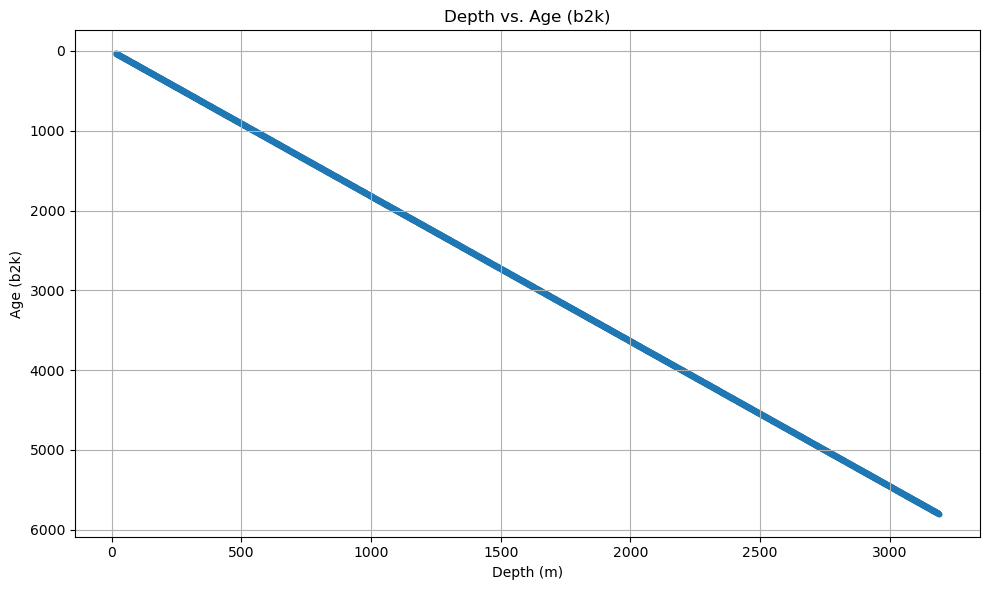

      Depth_m  b2k_age   Dust_ng_g       Na       Cl     NO3  MSA_ugperkg  \
0       15.95       30         NaN      NaN      NaN  11.426          NaN   
1       16.50       31         NaN  24.0991  12.4245  13.328     0.504545   
2       16.50       31         NaN  24.0991  12.4245  13.328     0.504545   
3       17.05       32         NaN  36.0227  24.5618  13.601     1.652000   
4       17.60       33         NaN      NaN      NaN  13.492          NaN   
...       ...      ...         ...      ...      ...     ...          ...   
5768  3187.25     5796   634.72730      NaN      NaN     NaN          NaN   
5769  3187.80     5797   801.35832      NaN      NaN     NaN    40.010000   
5770  3188.35     5798  1058.40200      NaN      NaN     NaN          NaN   
5771  3188.90     5799   663.79315      NaN      NaN     NaN    53.140000   
5772  3189.45     5800         NaN      NaN      NaN     NaN    56.280000   

      Cl_ugperkg  NO3_ugperkg  SO4_ugperkg  ...  Ca_ugperkg  ssNa_ugperkg  

(   Depth_m  b2k_age  Dust_ng_g       Na       Cl     NO3  MSA_ugperkg  \
 0    15.95       30        NaN      NaN      NaN  11.426          NaN   
 1    16.50       31        NaN  24.0991  12.4245  13.328     0.504545   
 2    16.50       31        NaN  24.0991  12.4245  13.328     0.504545   
 3    17.05       32        NaN  36.0227  24.5618  13.601     1.652000   
 4    17.60       33        NaN      NaN      NaN  13.492          NaN   
 
    Cl_ugperkg  NO3_ugperkg  SO4_ugperkg  ...  Ca_ugperkg  ssNa_ugperkg  \
 0         NaN          NaN          NaN  ...         NaN           NaN   
 1     12.4245       11.880      72.6727  ...         NaN           NaN   
 2     12.4245       11.880      72.6727  ...         NaN           NaN   
 3     24.5618       14.576      81.1209  ...         NaN           NaN   
 4         NaN          NaN          NaN  ...         NaN           NaN   
 
    nssca_ugperkg  nssSO4_trad_ugperkg  nssSO4_si_ugperkg  Naflux_ugm-2yr-1  \
 0            NaN      

In [62]:
# 加载数据
file_path = './EDC_merged_final_clean.csv'
df = pd.read_csv(file_path)

cols_to_drop = ['Age_kabp', 'Na', 'Cl', 'NO3']
df_cleaned = df.drop(columns=cols_to_drop, errors='ignore')

# 识别带有_x和_y后缀的列
cols_with_suffix_x = [col for col in df.columns if col.endswith('_x')]
cols_with_suffix_y = [col for col in df.columns if col.endswith('_y')]

# 检查对应的列，保留非空值较多的那一组
cols_to_keep = []
cols_to_drop = []

for col_x, col_y in zip(cols_with_suffix_x, cols_with_suffix_y):
    non_null_x = df[col_x].notnull().sum()
    non_null_y = df[col_y].notnull().sum()
    
    # 保留非空值更多的一列
    if non_null_x >= non_null_y:
        cols_to_keep.append(col_x)
        cols_to_drop.append(col_y)
    else:
        cols_to_keep.append(col_y)
        cols_to_drop.append(col_x)

# 删除多余的列
df_cleaned = df.drop(columns=cols_to_drop)

# 去掉保留列的后缀
df_cleaned.rename(columns=lambda x: x.rstrip('_x').rstrip('_y'), inplace=True)

# 删除重复的Age_kabp列（因为b2k_age已经存在）
if 'Age_kabp' in df_cleaned.columns:
    df_cleaned.drop(columns=['Age_kabp'], inplace=True)

# 检查数据质量（缺失值统计）
missing_values_summary = df_cleaned.isnull().sum()

# 可视化Depth与b2k_age关系
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Depth_m'], df_cleaned['b2k_age'], s=10, alpha=0.6)
plt.xlabel('Depth (m)')
plt.ylabel('Age (b2k)')
plt.title('Depth vs. Age (b2k)')
plt.grid(True)
plt.gca().invert_yaxis()  # 深度向下增加
plt.tight_layout()
plt.show()

print(df_cleaned)

df_cleaned.head(), df_cleaned.info(), missing_values_summary

In [63]:
df_cleaned.to_csv("./EDC_merged_4ML.csv", index=False)